# Empleabilidad Ecuador



Este proyecto está enfocado en analizar la demanda de empleo que se ofrece en las diferentes plataformas de empleo del Ecuador y relacionar dicha demanda con la oferta de cursos de capacitación que ofrecen los centros de capacitación, para lo cual hemos escogido un centro que provee capacitación online gratuita.

In [1]:
# import libraries needed for this job
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Lectura y Carga del dataframe

Con la ayuda de técnicas de webscrapping se generó un dataframe que contiene información de varias plataformas de ofertas de trabajo, que incluye información del Cargo, Provincia, Empresa, Descripción, Plataforma y URL.

In [2]:
# read csv file
jobs_df = pd.read_csv("jobs_csv_limpio.csv", encoding = "utf-8")
jobs_df.head()

,Cargo,Provincia,Empresa,Descripción,Plataforma,URL
0,ASISTENTE DE OFICINA QUITO,Pichincha,Banco Solidario,Nos encontramos en la busqueda de un ASISTENTE...,Indeed,https://ec.indeed.com/rc/clk?jk=d8afebe5bca3ac...
1,CERVECERIA NACIONAL,Loja,CERVECERIA NACIONAL,Asegurar disponibilidad del portafolio de prod...,Indeed,https://ec.indeed.com/rc/clk?jk=983f478c08551c...
2,HLGP,Guayas,HLGP,SEGURIDAD INDUSTRIAL Y SALUD OCUPACIONAL.,Indeed,https://ec.indeed.com/rc/clk?jk=4f9815af7f048f...
3,Se busca Recepcionista,Guayas,Confidencial,"Atención a clientes, manejo de archivo, manejo...",Indeed,https://ec.indeed.com/rc/clk?jk=4afc41374880c2...
4,Recepcionista y facturista,Manabí,Confidencial,Comercial / Ventas / Atención al Cliente.,Indeed,https://ec.indeed.com/rc/clk?jk=dea4b460c6ce1c...


In [3]:
# Check dataframe structure
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cargo        5574 non-null   object
 1   Provincia    5574 non-null   object
 2   Empresa      5574 non-null   object
 3   Descripción  5574 non-null   object
 4   Plataforma   5574 non-null   object
 5   URL          5574 non-null   object
dtypes: object(6)
memory usage: 261.4+ KB


* Este daframe tiene 5574 filas y 6 columnas.
* Todas las variables son del tipo `object`.

In [4]:
# Missing Values?
jobs_df.isna().sum()

Cargo          0
Provincia      0
Empresa        0
Descripción    0
Plataforma     0
URL            0
dtype: int64

No hay missing values.

In [5]:
# How many jobs are there per `Provincia`?
jobs_prov = jobs_df.iloc[:, 0:2]
jobs_prov.groupby('Provincia').count().sort_values('Cargo', ascending=False)

,Cargo
Provincia,
Guayas,1772
Pichincha,1515
Ecuador,1444
Azuay,230
Tungurahua,147
Loja,118
Manabí,69
Los Ríos,49
Santo Domingo de los Tsáchilas,42


La Provincia que más ofertas de trabajo tiene es Guayas, seguida por Pichincha. En tercer lugar está Ecuador y esto se refiere a que existen ofertas de trabajo del extranjero (o madalidad teletrabajo) y por lo tanto no están referenciadas a una provincia sino a todo el país. Las tres provincias más importantes del Ecuador son Pichincha, Guayas y Azuay, lo cual se refleja en tabla anteriormente presentada ya que la mayor cantidad de ofertas de trabajo están concetradas en estas provincias.

## 2. Análisis de Carreras Digitales Técnicas

Esta primera parte del análisis se enfoca en las carreras digitales técnicas, para lo cual se utilizará un vector que previamente fue generado y que contiene este tipo de carreras y que serán consideradas para realizar una búsqueda y agrupación en la columna `Cargo` del dataframe jobs_df. 

In [6]:
# Value count of 'Cargo' column
job = jobs_df['Cargo'].value_counts().reset_index()
job

,index,Cargo
0,Ayudante de bodega - Loja,102
1,Ayudante de Obra Civil - Guayaquil,102
2,ASISTENTE DE COMUNICACION -EVENTUAL,102
3,JEFE(A) DE AGENCIA,101
4,AUXILIARES DE MANTENIMIENTO,101
...,...,...
2909,COORDINADOR DE BODEGA,1
2910,FRAVEAR,1
2911,Contador(a),1
2912,Vendedor Ejecutivo Comercial - Guayaquil medio...,1


Se aprecia que los cargos no están expresados de manera consistente sino que se incluye información adicional como la ciudad o provincia, el género, en otros.
Por lo anterior, y con la ayuda del vector `possible_tech_jobs` se realizará una búsqueda en la columna `Cargo` de tal manera de extraer solamente las carreras o profesiones requeridas como tal.

In [7]:
# Posible tech digital jobs
possible_tech_jobs = ['Administrador Sistemas', 
                      'Analista de Satos', 
                      'Arquitecto de Software', 
                      'Científico de Datos',
                      'Community Manager', 
                      'Data Scientist', 
                      'Consultor TIC', 
                      'Desarrollador Full Stack', 
                      'Desarrollador Backend',
                      'Desarrollador de Software', 
                      'Front end', 
                      'Desarrollador Móvil', 
                      'Desarrollador Videojuegos',
                      'Web', 
                      'Product Manager', 
                      'Project Manager', 
                      'Diseñador Gráfico', 
                      'Administrador de Bases de Datos',
                      'E-Commerce', 
                      'Especialista SEO', 
                      'Especialista SEM', 
                      'Especialista UI', 
                      'Especialista UX', 
                      'Marketing Digital', 
                      'Ciberseguridad', 
                      'Ingeniero de Datos', 
                      'Data Engineer',
                      'QA',
                      'UX Designer − Diseñador Web', 
                      'Ing. de Sistemas', 
                      'SCRUM MASTER', 
                      'Web Developer', 
                      'Telemercadeo', 
                      'warehouse', 
                      '.NET Developer', 
                      'Diseñador Web', 
                      'Desarrollador App Mobile', 
                      'Remote UX/UI Graphic Designer', 
                      'Experto tecnologico', 
                      'Programador Apis, Sql', 
                      'PuntoNet', 
                      'Programador Senior',  
                      'Ingeniero/a Estadistica', 
                      'Programador PHP', 
                      'Diseñador Web WordPress', 
                      'Data Science Consultant', 
                      'Business Consultant', 
                      'Analista Digital', 
                      'Programador ODOO', 
                      'Desarrollador Software JAVA', 
                      'Android Nativo', 
                      'React js', 
                      'Programador Senior Aplicaciones Móviles', 
                      'Python SSR/SR', 
                      'Java SSR/SR', 
                      'Desarrollador Senior React JS Laravel', 
                      'DESARROLLADOR JAVASCRIPT', 
                      'Programador Javascript', 
                      'ANALISTA Q/A SOFTWARE', 
                      'Programador de software', 
                      'Ingeniero de software', 
                      'Desarrollador de Software.net', 
                      'Business Analyst', 
                      'Business Intelligence']

In [8]:
# The clean up process starts extracting the possible rules 
job_group_tech = job['index'].str.extractall('({0})'.format('|'.join(possible_tech_jobs)))

# Create a column name
job_group_tech.columns = ['new_job']

# Count the number of the possible rules and rename the dataframe
job_group_tech = pd.DataFrame(job_group_tech['new_job'].value_counts()).reset_index()
job_group_tech.rename(columns={'index': 'job', 'new_job': 'count'}, inplace=True)

# Include the percentage
job_group_tech['percentage %'] = job_group_tech['count'] / len(job_group_tech)
job_group_tech

,job,count,percentage %
0,Web,18,0.473684
1,QA,11,0.289474
2,Community Manager,9,0.236842
3,Marketing Digital,7,0.184211
4,Diseñador Web,4,0.105263
5,Programador Senior,3,0.078947
6,Diseñador Gráfico,3,0.078947
7,Project Manager,3,0.078947
8,Programador PHP,3,0.078947
9,Desarrollador Senior React JS Laravel,2,0.052632


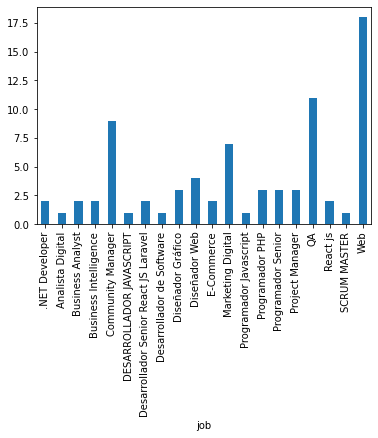

In [9]:
# tech jobs plot
job_group_tech.head(20).groupby('job')['count'].mean().plot(kind='bar');

El término `Web` es el que más aparece en esta búsqueda y está relacionado con: Desarrolador Web, Web Master, Programador Web, Web Developer, entre otros. 

## 3. Análisis de Carreras No Digitales Técnicas

La segunda parte del análisis se enfoca en las carreras no digitales técnicas, para lo cual se utilizará otro vector que contiene las carreras no digitales técnicas que serán consideradas para realizar una búsqueda y agrupación en la columna `Cargo` del dataframe jobs_df. 

In [10]:
non_tech_jobs = ['Abogada',
                 'Abogado',
                 'Administrador',
                 'Agente',
                 'Albañil',
                 'Almacenista',
                 'Analista',
                 'Arquitecta',
                 'Arquitecto',
                 'Asesor ',
                 'Asesoria Academica',
                 'Asesoría jurídica',
                 'Asistente',
                 'Auditor',
                 'Auxiliar', 
                 'Ayudante',
                 'Bachiller',
                 'Biólogo',
                 'Bioquímico',
                 'Bodeguero',
                 'Cajera',
                 'Cajero',
                 'Camarera',
                 'Camarero',
                 'Capacitador',
                 'Carpintero',
                 'Chef',
                 'Chofer',
                 'Cobrador',
                 'Cocinero',
                 'Cocturera ',
                 'Comunicador',
                 'Comunicadora ',
                 'Conductor',
                 'Conserje',
                 'Conserje ',
                 'Consultor',
                 'Contador',
                 'Controlador',
                 'Coordinador',
                 'Cosmetóloga',
                 'Costurera',
                 'Country Manager',
                 'CPA ',
                 'Dermatólogo/a Centro',
                 'Despachador',
                 'Dibujante',
                 'Digitador',
                 'Director',
                 'Directora ',
                 'distribuidor',
                 'Docente',
                 'Editor',
                 'Ejecutiva',
                 'Ejecutivo',
                 'Electricista',
                 'Electromecánico',
                 'Empacadores',
                 'Empleada doméstica',
                 'Emprendimiento',
                 'Encuestador',
                 'Enderezador',
                 'Enfermera',
                 'Enfermero',
                 'Especialista',
                 'Estibador',
                 'Gerente',
                 'Gestor',
                 'Guardia de Seguridad',
                 'Guia Turistico',
                 'Impulsadora ',
                 'Ing.',
                 'Ingeniera',
                 'Ingeniero',
                 'Inspector',
                 'Instalador dispositivos GPS',
                 'Instructor',
                 'Investigador',
                 'Jefe',
                 'Key account manager',
                 'Laboratorista',
                 'Laminador',
                 'Licenciado',
                 'Lider',
                 'Liquidador',
                 'Major Accounts Manager',
                 'Manicurista',
                 'Markenting bilingue',
                 'Mecánico',
                 'Médico',
                 'Mensajero',
                 'Mercaderista',
                 'Mesero',
                 'Nutricionista',
                 'Obrera',
                 'Obrero',
                 'Odontólogo',
                 'Oficial',
                 'Operador',
                 'Operario',
                 'Optómetra',
                 'Ortodoncista',
                 'Paletizador',
                 'Panadero',
                 'Pasante',
                 'Perchero',
                 'Periodistas',
                 'Periodoncista',
                 'Pizzero',
                 'Planificador',
                 'Pollero',
                 'Potabilizador',
                 'Psicóloga',
                 'Psicólogo',
                 'Productor',
                 'Profesor',
                 'Promotor',
                 'Recepcionista',
                 'Recursos Humanos',
                 'Redactores',
                 'Relacionista',
                 'Repartidor',
                 'Reportero ',
                 'Representante',
                 'Residente de obra',
                 'Secretaria',
                 'Sexólogo/a',
                 'Social media manager',
                 'Soldador',
                 'ubcontador/a',
                 'Subgerente ',
                 'Supervisor',
                 'Técnico',
                 'Tecnólogo',
                 'Telemercaderista',
                 'Teleoperador',
                 'Teleoperadora',
                 'Teletrabajo',
                 'Teletrabajo ',
                 'Terapista',
                 'Traductor ',
                 'Trainee ',
                 'Vendedor',
                 'Veterinario ',
                 'Vigilante ',
                 'Visitador Médico']

In [11]:
# The clean up process starts extracting the possible rules 
job_group_nontech = job['index'].str.extractall('({0})'.format('|'.join(non_tech_jobs)))

# Create a column name
job_group_nontech.columns = ['new_job']

# Count the number of the possible rules and rename the dataframe
job_group_nontech = pd.DataFrame(job_group_nontech['new_job'].value_counts()).reset_index()
job_group_nontech.rename(columns={'index': 'job', 'new_job': 'count'}, inplace=True)

# Include the percentage
job_group_nontech['percentage'] = job_group_nontech['count'] / len(job_group_nontech)
job_group_nontech = pd.DataFrame(job_group_nontech)
job_group_nontech.head(20)

,job,count,percentage
0,Asistente,147,1.035211
1,Vendedor,100,0.704225
2,Ejecutivo,77,0.542254
3,Asesor,75,0.528169
4,Técnico,73,0.514085
5,Auxiliar,70,0.492958
6,Jefe,67,0.471831
7,Coordinador,66,0.464789
8,Analista,65,0.457746
9,Supervisor,58,0.408451


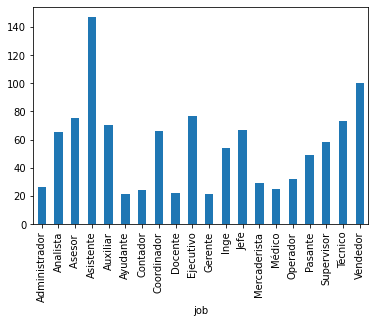

In [12]:
# non-tech jobs plot
job_group_nontech.head(20).groupby('job')['count'].mean().plot(kind='bar');

Se debe tomar en cuenta que para este prototipo se han agrupado los diferentes cargos, como por ejemplo, el cargo de asistente incluye asistente contable, comercial, administrativo, calidad, etc. Esta misma consideración aplica a los diferentes cargos.

## 4. Análisis de Habilidades

La cuarta parte del análisis se refiere a las habilidades requeridas en los diferentes cargos técnicos digitales, para lo cual y al igual que en los anteriores casos vamos a utilizar una lista previamente definida pero la búsqueda se lo realizará en la columna `Descripción` de dataframe jobs_df.

In [13]:
# Value count of 'Descripción' column
skill = jobs_df['Descripción'].value_counts().reset_index()
skill

,index,Descripción
0,Ninguno,791
1,Asignar rutas de entrega de mercadería y prior...,400
2,Disponibilidad de cambio de residencia:,161
3,"Estudios universitarios en marketing, diseño d...",100
4,Chemonics seeks an Ecuador country manager for...,100
...,...,...
2178,CUENTAS POR COBRAR – CUENTAS POR CAPAGAR.,1
2179,Importante empresa multinacional de consumo ma...,1
2180,Se requiere Bioquímico Clínico para laboratori...,1
2181,Empresa de productos de limpieza busca persona...,1


In [14]:
possible_skills = ['.NET Framework',
                   'Accelerated Mobile Pages', 
                   'Active Server Pages',
                   'Adobe Creative Cloud',
                   'Adobe Illustrator',
                   'Adobe Photoshop',
                   'Adobe Premiere Pro',
                   'Amazon Web Services', 
                   'Angular',
                   'AngularJS',
                   'Ansible',
                   'Apache Hadoop',
                   'Apache Hive',
                   'Apache Kafka',
                   'Apache Maven',
                   'Apache Spark',
                   'App Store Optimization',
                   'Appium',
                   'Application programming interface', 
                   'Base de datos',
                   'Bootstrap',
                   'Business intelligence',
                   'CCNA',
                   'Cloud computing',
                   'Cloudera Platform',
                   'COBOL',
                   'CSS',
                   'Cucumber',
                   'Deep Learning',
                   'Design thinking',
                   'Docker',
                   'Email marketing',
                   'Extract, Transform and Load', 
                   'Firewall',
                   'Git',
                   'GNU/Linux',
                   'Google Ads',
                   'Google Analytics',
                   'Hacking',
                   'Hibernate',
                   'Hootsuite',
                   'HTML',
                   'IBM Db2 Family',
                   'Inteligencia Artificial',
                   'Intrusion prevention system',
                   'ITIL',
                   'Java',
                   'JavaScript',
                   'Jenkins',
                   'JIRA',
                   'jQuery',
                   'Kanban',
                   'Kotlin',
                   'Machine learning',
                   'Microservicios',
                   'Microsoft Azure',
                   'Microsoft Dynamics',
                   'Microsoft Office',
                   'Microsoft PowerPoint',
                   'Microsoft SQL Server',
                   'MicroStrategy',
                   'Model View Controller',
                   'MongoDB',
                   'MySQL',
                   'Node.js',
                   'Oracle RAC',
                   'PHP',
                   'PostgreSQL',
                   'PrestaShop',
                   'Project Management Professional', 
                   'PMP',
                   'Public Key Infrastructure', 
                   'PKI',
                   'Publicidad Digital',
                   'Python',
                   'Qlik',
                   'R programing language',
                   'React',
                   'Realidad virtual',
                   'Redes de comunicación',
                   'Redes sociales',
                   'SAP',
                   'Sass',
                   'Scala',
                   'Scripting language',
                   'Scrum',
                   'Search Engine Marketing',
                   'Search Engine Optimization',
                   'Security Information and Event Management', 
                   'Selenium',
                   'SEMrush',
                   'SOAP',
                   'Spring Framework',
                   'Swift',
                   'Tableau',
                   'TensorFlow',
                   'TypeScript',
                   'UiPath',
                   'Unity',
                   'Unix',
                   'User Experience',
                   'User Interface', 
                   'Visual Basic',
                   'VMware',
                   'WordPress',
                   'XML']

In [15]:
# The clean up process starts extracting the possible rules 
skills_group = skill['index'].str.extractall('({0})'.format('|'.join(possible_skills)))

# Create a column name
skills_group.columns = ['new_skill']

# Count the number of the possible rules and rename the dataframe
skills_group = pd.DataFrame(skills_group['new_skill'].value_counts()).reset_index()
skills_group.rename(columns={'index': 'skills', 'new_skill': 'count'}, inplace=True)

# Include the percentage
skills_group['percentage'] = skills_group['count'] / len(skills_group)
#np.sum(skills_group['count'])
skills_group = pd.DataFrame(skills_group)
skills_group.head(20)

,skills,count,percentage
0,Java,14,0.43750
1,PHP,10,0.31250
2,SAP,9,0.28125
3,HTML,9,0.28125
4,CSS,7,0.21875
5,Microsoft Office,6,0.18750
6,WordPress,3,0.09375
7,Angular,3,0.09375
8,Microsoft Dynamics,3,0.09375
9,Scrum,3,0.09375


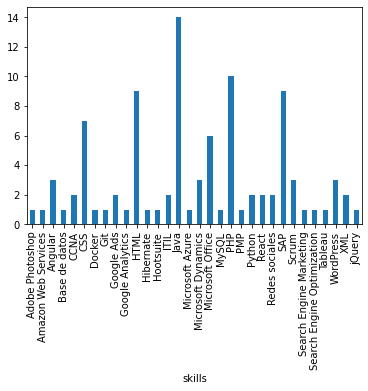

In [16]:
skills_group.groupby('skills')['count'].mean().plot(kind='bar');

## 5. Análisis de Centro de Capacitación

En la quinta parte del análisis, se considera el dataset de un centro de capacitación. Este archivo fue previamente procesado (cleaning and feature engineering) en R.

In [17]:
# read the csv file and parse dates
train_center = pd.read_csv('training_center_ec.csv', parse_dates=['Fecha_inicio', 'Fecha_fin', 'Fecha_registro',
                                                                 'Ultimo_login', 'Fecha_nacimiento'])
# eliminate 'Unnamed: 0' column
train_center.drop(['Unnamed: 0'], axis=1, inplace=True)

# change ID type to object
train_center['ID'] = train_center['ID'].astype('object')
train_center.head()

,ID,Curso,Fecha_inicio,Fecha_fin,Estado,Puntuacion,Sexo,Fecha_registro,Ultimo_login,Fecha_nacimiento,Ciudad,Pais,Desempleado,Nivel_estudios,Tiempo_exp_laboral,Tiempo_reg_serv_emp,Tiempo_desemp,Edad,Tiempo_curso,Provincia
0,16807,Metodologias_Agiles_Lean,NaT,NaT,No iniciado,NaN,Hombre,2019-11-21,2019-11-26,1947-07-18,otavalo,Ecuador,SI,Máster/Posgrado,Más de 2 años,No tiene,No tiene,72.87,NaN,Imbabura
1,6163,Metodologias_Agiles_Lean,NaT,NaT,No iniciado,NaN,Hombre,2019-11-20,2019-11-20,1952-02-14,quito,Ecuador,NO,Licenciatura,Más de 2 años,NaN,NaN,68.29,NaN,Pichincha
2,11583,Metodologias_Agiles_Lean,2019-12-04,2019-12-10,Aprobado,91.0,Hombre,2019-11-22,2020-02-06,1954-05-12,quito,Ecuador,NO,Licenciatura,NaN,NaN,NaN,66.05,7.0,Pichincha
3,7278,Metodologias_Agiles_Lean,2019-12-14,2019-12-15,Aprobado,91.0,Mujer,2019-09-30,2019-12-15,1954-10-25,quito,Ecuador,NO,Licenciatura,Más de 2 años,NaN,NaN,65.59,2.0,Pichincha
4,10890,Metodologias_Agiles_Lean,NaT,NaT,No iniciado,NaN,Mujer,2019-09-22,2019-09-25,1955-04-24,quito,Ecuador,NO,Licenciatura,Más de 2 años,Más de 2 años,NaN,65.10,NaN,Pichincha


In [18]:
# check the dataframe `train_center` 
train_center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8269 entries, 0 to 8268
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   8269 non-null   object        
 1   Curso                8269 non-null   object        
 2   Fecha_inicio         5726 non-null   datetime64[ns]
 3   Fecha_fin            4043 non-null   datetime64[ns]
 4   Estado               8269 non-null   object        
 5   Puntuacion           5657 non-null   float64       
 6   Sexo                 8269 non-null   object        
 7   Fecha_registro       8269 non-null   datetime64[ns]
 8   Ultimo_login         8269 non-null   datetime64[ns]
 9   Fecha_nacimiento     8269 non-null   datetime64[ns]
 10  Ciudad               8269 non-null   object        
 11  Pais                 8269 non-null   object        
 12  Desempleado          8269 non-null   object        
 13  Nivel_estudios       8269 non-nul

In [19]:
train_center['Sexo'] = train_center['Sexo'].astype('category')

In [20]:
# Missing values in train_center dataframe
train_center.isna().sum()

ID                        0
Curso                     0
Fecha_inicio           2543
Fecha_fin              4226
Estado                    0
Puntuacion             2612
Sexo                      0
Fecha_registro            0
Ultimo_login              0
Fecha_nacimiento          0
Ciudad                    0
Pais                      0
Desempleado               0
Nivel_estudios            0
Tiempo_exp_laboral     3065
Tiempo_reg_serv_emp    4788
Tiempo_desemp          4532
Edad                      0
Tiempo_curso           4226
Provincia                 0
dtype: int64

In [21]:
# Let's check `Curso` column and count values of it
train_center['Curso'].value_counts()

Emprendimiento                   3070
Metodologias_Agiles_Lean         2033
Marketing_digital                 645
Wordpress                         327
Introduccion_Machine_Learning     317
Habilidades_socioemocionales      289
TICs_basico                       289
Diseno_web_HTML5_CSS              272
Growth_Hacking                    271
Habilidades_para_empleo           256
Introducción_programacion         206
Creacion_android_apps             187
Creacion_paginas_web               78
Analitica_web                      29
Name: Curso, dtype: int64

In [22]:
# What about the status of the trainings
train_center['Estado'].value_counts()

Aprobado       3728
No iniciado    2543
Iniciado       1683
Suspenso        315
Name: Estado, dtype: int64

In [23]:
# How many female and male are there?
train_center['Sexo'].value_counts()

Mujer     4289
Hombre    3980
Name: Sexo, dtype: int64

In [24]:
# How many attendees per Province?
train_center['Provincia'].value_counts()

Pichincha           2115
El Oro              1540
Guayas              1382
Imbabura             595
Manabi               342
Esmeraldas           294
Napo                 263
Azuay                259
Los Rios             220
Sucumbios            164
Chimborazo           147
Morona Santiago      127
Loja                 122
Tungurahua           122
Santo Domingo        116
Orellana             101
Santa Elena           87
Cotopaxi              78
Carchi                54
Bolivar               46
Cañar                 39
Zamora Chinchipe      27
Pastaza               23
Galapagos              6
Name: Provincia, dtype: int64

In [25]:
# Some statistics of numerical columns
train_center.describe()

,Puntuacion,Edad,Tiempo_curso
count,5657.000000,8269.000000,4043.000000
mean,64.606152,30.962571,14.784071
std,37.694752,10.295029,16.567142
min,0.000000,17.510000,1.000000
25%,26.000000,23.420000,2.000000
50%,86.000000,27.580000,8.000000
75%,93.000000,36.500000,23.000000
max,100.000000,72.870000,157.000000


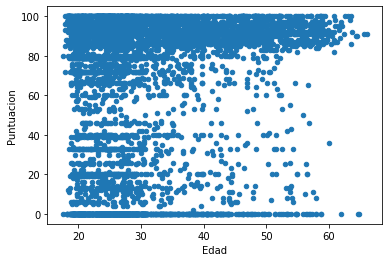

In [26]:
# Scatter plot
train_center.plot(x='Edad', y='Puntuacion', kind='scatter');

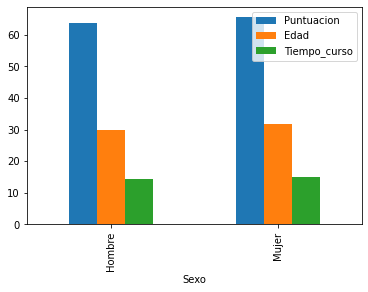

In [27]:
#barplot of Sex and the mean of the Puntuacion, Edad and Tiempo_curso
train_center.groupby('Sexo').mean().plot(kind='bar');

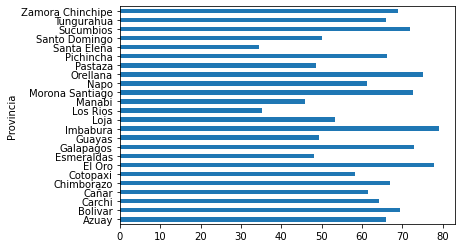

In [28]:
# barplot of the Provincia and the mean of the age
train_center.groupby('Provincia')['Puntuacion'].mean().plot(kind='barh');

## 6. Análisis de textos (NLP)

**Exploratory Data analysis - Job descriptions**

In [29]:
#pip install nltk 
#pip install bokeh
#pip install wordcloud
#pip install gensim

In [30]:
#nltk.download()
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')
#nltk.download('universal_tagset')

In [31]:
#Se importan las librerías necesarias
import re
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
stop_words = set(stopwords.words('spanish','english')) 
from string import punctuation
import collections

In [32]:
#Extraemos las celdas que vamos a analizar (Columna 'Descripción')
pd.set_option('display.max_colwidth', 2)
desc = jobs_df.loc[1,'Descripción']

#Creación de una lista de palabras a partir de todas las descripciones
all_desc = []
for i in range(0,jobs_df.shape[0]):
    desc = jobs_df.loc[i,'Descripción']
    desc1 = desc.lower()
    #Remoción de números, símbolos, etiquetas html usando regex
    desc2 = re.sub('[0-9]+\S+|\s\d+\s|\w+[0-9]+|\w+[\*]+.*|\s[\*]+\s|www\.[^\s]+','',desc1)
    #Remoción de signos de punctuación
    for p in punctuation:
        desc2 = desc2.replace(p,'')
    all_desc.append(desc2)

In [33]:
#Creación de tokens para todas las descripciones
final_list = []
for desc in all_desc:
    word_list = word_tokenize(desc)
    final_list.extend(word_list)

In [34]:
final_list[:10]

['nos',
 'encontramos',
 'en',
 'la',
 'busqueda',
 'de',
 'un',
 'asistente',
 'de',
 'oficina']

**FreqDist 7 most_common**

La función `FreqDist` devuelve la frecuencia de cada palabra en el texto.
La función `len(vocab)` nos devuelve el número de palabras únicas presentes en el texto. 
Así podmeos obtener el vocabulario más común


In [35]:
vocab = nltk.FreqDist(final_list)
print(len(vocab))
print(vocab.most_common(20))

11004
[('de', 13973), ('y', 5116), ('en', 4270), ('la', 3726), ('para', 2645), ('los', 2362), ('a', 2210), ('el', 2113), ('con', 1842), ('and', 1154), ('experiencia', 1097), ('del', 1032), ('que', 982), ('o', 967), ('las', 954), ('por', 870), ('the', 864), ('al', 840), ('empresa', 806), ('ninguno', 791)]


Encontramos que la todas las descripciones de nuestro dataset contienen un total de 11004 palabras, además se muestran las 20 más usadas. Para eliminar aquellas palabras que no aportan demasiado al contexto podemos incluír la siguiente función:

In [36]:
mc = sorted([w for w in vocab.most_common(80) if len(w[0]) > 4], key=lambda x: x[1], reverse=True)
print(mc)

[('experiencia', 1097), ('empresa', 806), ('ninguno', 791), ('clientes', 646), ('mercadería', 610), ('afines', 549), ('equipo', 506), ('disponibilidad', 451), ('entrega', 441), ('valores', 440), ('calidad', 433), ('personal', 431), ('vendedores', 428), ('importante', 421), ('envió', 410), ('posterior', 409), ('registrar', 406), ('rutas', 403), ('despachos', 401), ('asignar', 400), ('priorizar', 400), ('recaudados', 400), ('trabajo', 349), ('requiere', 335), ('control', 316), ('servicios', 313), ('ventas', 311), ('ciudad', 304), ('carreras', 303), ('búsqueda', 293), ('información', 292), ('mínima', 289), ('estudios', 287), ('requisitos', 282), ('marketing', 272), ('productos', 271), ('acuerdo', 268), ('cargo', 262), ('procesos', 262), ('manejo', 261), ('presencia', 247), ('entre', 247), ('atención', 243), ('ecuador', 240), ('proyectos', 238), ('comercial', 237), ('materiales', 236)]


In [37]:
#Tranformamos de tupla a lista usando itertools
import itertools 
      
out = list(itertools.chain(*mc)) 
  
#printing output 
print(out) 

['experiencia', 1097, 'empresa', 806, 'ninguno', 791, 'clientes', 646, 'mercadería', 610, 'afines', 549, 'equipo', 506, 'disponibilidad', 451, 'entrega', 441, 'valores', 440, 'calidad', 433, 'personal', 431, 'vendedores', 428, 'importante', 421, 'envió', 410, 'posterior', 409, 'registrar', 406, 'rutas', 403, 'despachos', 401, 'asignar', 400, 'priorizar', 400, 'recaudados', 400, 'trabajo', 349, 'requiere', 335, 'control', 316, 'servicios', 313, 'ventas', 311, 'ciudad', 304, 'carreras', 303, 'búsqueda', 293, 'información', 292, 'mínima', 289, 'estudios', 287, 'requisitos', 282, 'marketing', 272, 'productos', 271, 'acuerdo', 268, 'cargo', 262, 'procesos', 262, 'manejo', 261, 'presencia', 247, 'entre', 247, 'atención', 243, 'ecuador', 240, 'proyectos', 238, 'comercial', 237, 'materiales', 236]


In [38]:
#Etiquetas de texto
pos_tagged = nltk.pos_tag(final_list, tagset='universal')

#Identificación de las partes más comunes en el texto
tag_fd = nltk.FreqDist(tag for (word, tag) in pos_tagged)
tag_fd.most_common()[:15]

[('NOUN', 57360),
 ('X', 44813),
 ('ADJ', 18101),
 ('VERB', 12880),
 ('ADP', 9877),
 ('DET', 3846),
 ('CONJ', 1360),
 ('ADV', 1269),
 ('PRON', 734),
 ('PRT', 723),
 ('NUM', 54)]

In [39]:
#Exclusión de stopwords para el análisis
from nltk.corpus import stopwords
#en_stop_words = set(stopwords.words('english')) 
#es_stop_words = set(stopwords.words('spanish')) 

list_wo_stopwords = []
for w in final_list:
    if w not in stop_words and out:
        list_wo_stopwords.append(w)
        
#Etiquetas sin stopwords
pos_tagged_wo_sw = nltk.pos_tag(list_wo_stopwords, tagset='universal')

#Identificación de las partes más comunes en el texto sin contar las stopwords
tag_fd_wo_sw = nltk.FreqDist(tag for (word, tag) in pos_tagged_wo_sw)
tag_fd_wo_sw.most_common()[:15]

[('NOUN', 58442),
 ('ADJ', 17467),
 ('VERB', 14025),
 ('ADP', 3407),
 ('DET', 1413),
 ('CONJ', 1286),
 ('ADV', 1272),
 ('X', 1162),
 ('PRT', 821),
 ('PRON', 720),
 ('NUM', 52)]

,words,freq
186,and,1154
218,experiencia,1097
125,the,864
47,empresa,806
629,ninguno,791
237,to,689
28,clientes,646
451,mercadería,610
43,afines,549
191,of,542


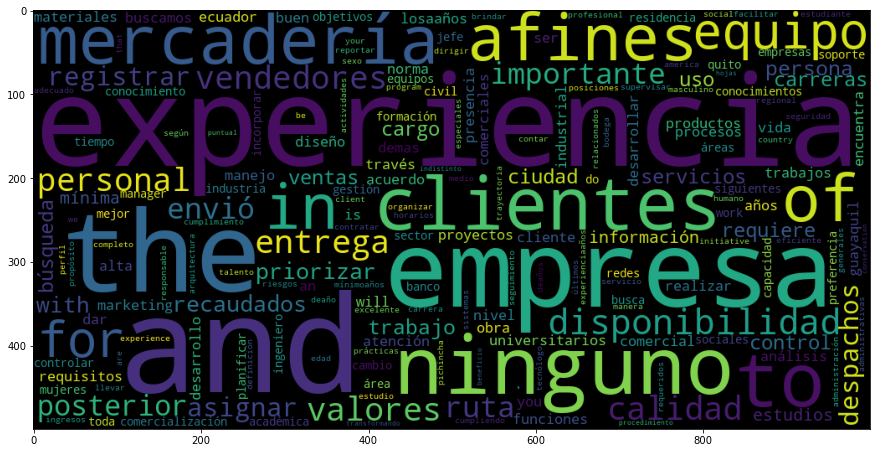

In [40]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#Lematizatción sin especificar partes del texto
list_lemmatized = []
for word in list_wo_stopwords:
    list_lemmatized.append(lemmatizer.lemmatize(word))

word_freq_lem = dict(collections.Counter(list_lemmatized))
keys = list(word_freq_lem.keys())
values = list(word_freq_lem.values())
df_lem = pd.DataFrame({'words':keys,'freq':values})
display(df_lem.sort_values(by = 'freq',ascending = False)[:10])

from wordcloud import WordCloud
from collections import Counter
word_could_dict=Counter(word_freq_lem)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

Como se observa en la nube, entre las palabras más frecuentes al momento de ofertar un empleo tenemos: experiencia, empresa, clientes, mercadería	


**Word2Vec**


Es un enfoque no supervisado, es decir, no implica el uso de etiquetas, solo coloca las palabras similares juntas y palabras diferentes muy separadas. Para entrenar Word2Vec es mejor no eliminar palabras o números de parada porque el algoritmo se basa en el contexto más amplio de la oración para producir vectores de palabras de alta calidad.

In [41]:
def review_to_wordlist( review, remove_stopwords=False ):
    #Esta función convierte un texto en una secuencia de palabras
    #Opcionalmente se pueden remover las stop words y se genera una lista de palabras
    
    # 1. Remoción de HTML
    review_text = BeautifulSoup(review).get_text()
    #  
    # 2. Remoción de caracteres no literales
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    #
    # 3. Conversión de palabras a mínusculas y separación
    words = review_text.lower().split()
    #
    # 4. Opcionalmente eliminamos las stop words (false por defecto)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 5. Se genera una lista de palabras
    return(words)

In [73]:
from nltk import word_tokenize,sent_tokenize

# Cargamos el tokenizador punkt
tokenizer = nltk.data.load('tokenizers/punkt/spanish.pickle')

# Definimos una función para separar por oraciones
def review_to_sentences( review, tokenizer, remove_stopwords=False ):
    # Se genera una lista de oraciones donde cada una pertenece a una lista de palabras
    
    # 1. Usamos el tokenizador NLTK para separar los párrafos en oraciones simples
    raw_sentences = tokenizer.tokenize(review.strip())
    
    # 2. Iteramos por cada oración
    sentences = []
    for raw_sentence in raw_sentences:
        # Si una oración está vacía se la pasa por alto
        if len(raw_sentence) > 0:
            # Caso contrario, se llama la función review_to_wordlist para obtener
            #la lista de palabras
            sentences.append( review_to_wordlist( raw_sentence, \
              remove_stopwords ))
    
    # Finalmente se genera una lista de listas
    return sentences

In [43]:
from gensim.models import Word2Vec

#data2 = Word2Vec(jobs_df["Cargo"])
data = (final_list)

print(data)
#print(data2)

['nos', 'encontramos', 'en', 'la', 'busqueda', 'de', 'un', 'asistente', 'de', 'oficina', 'que', 'maneje', 'documentación', 'administrada', 'y', 'ejecute', 'actividades', 'asignadas', 'tales', 'como', 'asegurar', 'disponibilidad', 'del', 'portafolio', 'de', 'productos', 'de', 'acuerdo', 'al', 'subcanal', 'y', 'desarrollarlos', 'utilizando', 'efectivamente', 'los', 'recursos', 'alcanzando', 'la', 'satisfacción…', 'seguridad', 'industrial', 'y', 'salud', 'ocupacional', 'atención', 'a', 'clientes', 'manejo', 'de', 'archivo', 'manejo', 'de', 'llamadas', 'telefónicas', 'comercial', 'ventas', 'atención', 'al', 'cliente', 'tres', 'a', 'seis', 'meses', 'como', 'asistente', 'de', 'almacén', 'bodega', 'o', 'desempeñando', 'cargos', 'afines', 'disponibilidad', 'de', 'cambio', 'de', 'residencia', 'importante', 'empresa', 'del', 'sector', 'alimenticio', 'está', 'en', 'la', 'búsqueda', 'de', 'personal', 'para', 'trabajar', 'en', 'supermercado', 'unilever', 'es', 'una', 'de', 'las', 'empresas', 'de', 

**Creación de un training y test set**

In [44]:
np.random.shuffle(data)
print(len(data))

151017


In [45]:
print(151017*.8)
print(151017*.2)

120813.6
30203.4


In [46]:
#np.random.shuffle(word_freq_lem)
training_set = data[:120813]
testing_set = data[120813:]
print(len(training_set), len(testing_set))

120813 30204


In [72]:
#Nos aseguramos de verificar la proporción de los sets de prueba y entrenamiento. 
print("El dataset se ha dividido en {:.2%} para su  y {:.2%} para prueba".format(len(training_set)/len(data), len(testing_set)/len(data)))

El dataset se ha dividido en 80.00% para su  y 20.00% para prueba


In [48]:
from sklearn.model_selection import train_test_split

X = jobs_df["Descripción"]
y = jobs_df["Cargo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [49]:
#Lematización de palabras y eliminación de signos de puntuación y stop words 
lemmatizer = WordNetLemmatizer()

def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove URLs
    2. Remove punctuation
    3. Remove numbers
    4. Remove stopwords
    5. Return the cleaned text as a list of lemmatized words
    '''
    
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text, flags=re.MULTILINE)
    
    text = ''.join([t for t in text if t not in string.punctuation])
    
    text = ''.join([t for t in text if not t.isdigit()])
    
    return [lemmatizer.lemmatize(word) for word in text.split() if word.lower() not in stopwords.words('english')]

In [50]:
from sklearn.feature_extraction.text import CountVectorizer


In [51]:
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None, 
                             preprocessor = None,
                             stop_words = None,  
                             max_features = 5000)

In [52]:
train_data_features = vectorizer.fit_transform(data)

In [53]:
train_data_features = train_data_features.toarray()


In [54]:
train_data_features.shape

(151017, 5000)

In [55]:
vocab = vectorizer.get_feature_names()
print(vocab)

['aaños', 'abastecimiento', 'abierta', 'ability', 'able', 'abordar', 'abordarlos', 'about', 'above', 'acabados', 'academia', 'académica', 'académicatítulo', 'académico', 'académicos', 'accept', 'acceso', 'accesorios', 'access', 'accidentes', 'acciones', 'acción', 'accommodation', 'according', 'account', 'accounting', 'accounts', 'aceites', 'acelerar', 'aceptables', 'aceptados', 'aceptan', 'aceptar', 'acerca', 'acercarse', 'acess', 'achieve', 'achieving', 'acompañamiento', 'acompañar', 'acondicionados', 'acorde', 'acoso', 'across', 'acrílicas', 'actas', 'action', 'actioncoach', 'actions', 'actitud', 'activa', 'activaciones', 'activación', 'activas', 'actividad', 'actividades', 'actividadesrealizar', 'actividadesrevisar', 'activities', 'activo', 'activos', 'actores', 'actual', 'actuales', 'actualización', 'actualizada', 'actualizado', 'actualizados', 'actualizar', 'actualmente', 'acuerda', 'acuerdo', 'acuerdos', 'acumen', 'acuícola', 'ad', 'adapt', 'adaptación', 'adaptarse', 'additional'

In [56]:
#Using RandomForest Classifier to classify Descriptions
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(train_data_features, data, 
                                                    test_size=0.2)

In [58]:
RF = RandomForestClassifier(n_estimators = 15)
RF.fit( X_train, y_train )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
predictions = RF.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [61]:
print(classification_report(y_test,predictions))

/opt/miniconda3/envs/py_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/py_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                           precision    recall  f1-score   support

                                        1       0.00      0.00      0.00         1
                                        2       0.00      0.00      0.00         1
                                        5       0.00      0.00      0.00         1
                                        a       0.00      0.00      0.00       447
                                       aa       0.00      0.00      0.00         1
                                    aaños       1.00      1.00      1.00         3
                               abastecida       0.00      0.00      0.00         1
                           abastecimiento       1.00      1.00      1.00         2
                                  abierta       1.00      1.00      1.00         1
                                abilities       0.00      0.00      0.00         1
                                  ability       1.00      1.00      1.00        13
   

## 7. Análisis de frecuencias

In [62]:
def cleanData(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc if word.isalpha() and len(word) > 2]
    desc = [word for word in desc if word not in stop_words]
    return desc

In [63]:
import nltk
from nltk import word_tokenize

from nltk.corpus import stopwords
stop_words = stopwords.words('english','spanish')

tags_df = jobs_df["Descripción"].apply(cleanData)

In [64]:
from collections import Counter
result = tags_df.apply(Counter).sum().items()
result = sorted(result, key=lambda kv: kv[1],reverse=True)
result_series = pd.Series({k: v for k, v in result})

In [65]:
#Seleccionamos diferentes Skillsets y observamos su frecuencia de demanda

skills = ["tableau","power","qlik"]
skills2 = ["aws","azure","gcp"]
skills3 = ["nltk","pandas","numpy","matplotlib","jupyter","opencv","R","python","sql"]
skills4 = ["science","machine","deep","neural","predictive","cloud","fog","edge"]
skills5 = ["experimentado","experto","pasante","intermedio","graduado","junior"]
skills6 = ["estadística","tecnología","datos","digital","predictivo"]

A continuación se puede apreciar visualmente la distribución de las habilidades seleccionadas:

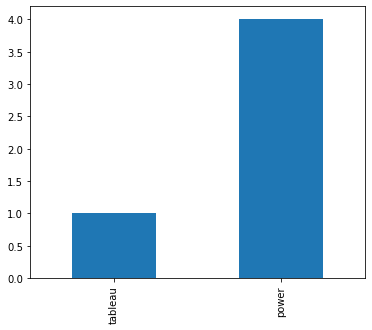

In [66]:
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(6,5))

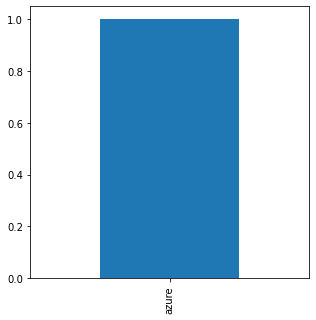

In [67]:
filter_series = result_series.filter(items=skills2)
filter_series.plot(kind='bar',figsize=(5,5))

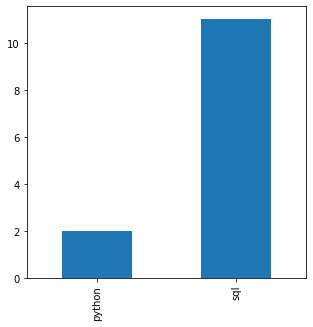

In [68]:
filter_series = result_series.filter(items=skills3)
filter_series.plot(kind='bar',figsize=(5,5))

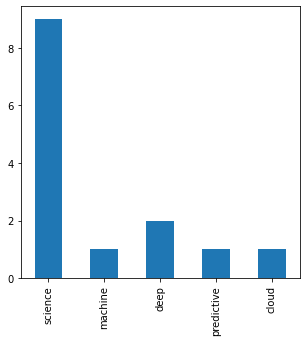

In [69]:
filter_series = result_series.filter(items=skills4)
filter_series.plot(kind='bar',figsize=(5,5))

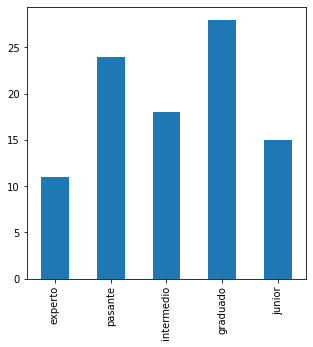

In [70]:
filter_series = result_series.filter(items=skills5)
filter_series.plot(kind='bar',figsize=(5,5))

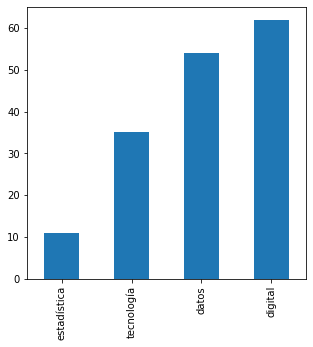

In [71]:
filter_series = result_series.filter(items=skills6)
filter_series.plot(kind='bar',figsize=(5,5))

## 8. Mapa de empleabilidad

### Código para graficar mapa en R

`mapdata <- get_data_from_map(download_map_data("countries/ec/ec-all"))
    data_ecuador <- mapdata %>% 
        select(PROVINCIA = `hc-a2`) %>% 
        mutate(X = c(195735, 17482, 5014, 15304, 7071, 16619, 18442, 31332,
                     19800, 14432, 2316, 5876, 4010, 12891, 20372, 52237,
                     15301, 2834, 226122, 2815, 23916, 6050, 3877, 	2811, 499))
    mapa1 <- hcmap("countries/ec/ec-all", data = data_ecuador, value = "X",
                   joinBy = c("hc-a2", "PROVINCIA"),
                   dataLabels = list(enabled = TRUE, format = '{point.name}'))`  

## 9. Perspectivas

- Evaluar distintos modelos de clasificación y elegir el que nos genere la mejor precisión para poder generar un sistema de recomendaciones de cursos y/o profesiones de acuerdo al perfil del solicitante.
- Escalar e proyecto hasta desarrollar un orientador/asesor profesional virtual.
- Implementación de chatbot
- Revisión de Hojas de vida a través de redes neuronales y NLP.
- Presentarlo a modo de web app o app móvil.